#2-2.データを読み込んでみよう

In [1]:
print('hello')

hello


In [2]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

import os
# 作業フォルダへの移動を行います。
# もしアップロードした場所が異なる場合は作業場所を変更してください。
os.chdir('/content/drive/MyDrive/DA_WB/2章/data')

Mounted at /content/drive


In [3]:
import pandas as pd
df_sales_2021 = pd.read_csv('売上テーブル_2021.csv', encoding='SJIS')
df_sales_2021.head()

,売上ID,顧客ID,契約ID,売上日,売上
0,S-1000072,C-1000222,N-1002716,2021/1/1,6000.0
1,S-1000073,C-1000458,N-1000683,2021/1/1,50000.0
2,S-1000074,C-1000599,N-1001044,2021/1/1,10000.0
3,S-1000075,C-1000599,N-1001042,2021/1/1,10000.0
4,S-1000076,C-1000599,N-1001041,2021/1/1,10000.0


In [4]:
df_sales_2022 = pd.read_csv('売上テーブル_2022.csv', encoding='SJIS')
df_sales_2022.head()

,売上ID,顧客ID,契約ID,売上日,売上
0,S-1125052,C-1000892,N-1001965,2022/1/1,29000
1,S-1125053,C-1001352,N-1003792,2022/1/1,10000
2,S-1125054,C-1000547,N-1000944,2022/1/1,30000
3,S-1125055,C-1000072,N-1000075,2022/1/1,10000
4,S-1125056,C-1000222,N-1000275,2022/1/1,50000


In [5]:
df_customer = pd.read_csv('顧客テーブル.csv', encoding='SJIS')
df_customer.head()

,顧客ID,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度
0,C-1000007,企業規模小,株式会社鈴木工業,関東地方,東京都,台東区,2015/1/9,101782,3
1,C-1000008,その他,株式会社中村工業,四国,徳島県,徳島市,2015/1/15,100726,3
2,C-1000009,企業規模中,大和屋根工事合同会社,関西地方,三重県,津市,2015/1/19,101305,2
3,C-1000010,企業規模大,株式会社ユタカ,関東地方,千葉県,松戸市,2015/1/19,107576,5
4,C-1000011,企業規模中,合資会社橋本商店,関東地方,東京都,大田区,2015/1/21,103152,1


#2-3.データを結合してみよう

In [6]:
df_sales = pd.concat([df_sales_2021, df_sales_2022], ignore_index=True)
df_sales.head()

,売上ID,顧客ID,契約ID,売上日,売上
0,S-1000072,C-1000222,N-1002716,2021/1/1,6000.0
1,S-1000073,C-1000458,N-1000683,2021/1/1,50000.0
2,S-1000074,C-1000599,N-1001044,2021/1/1,10000.0
3,S-1000075,C-1000599,N-1001042,2021/1/1,10000.0
4,S-1000076,C-1000599,N-1001041,2021/1/1,10000.0


In [7]:
df_sales.tail()

,売上ID,顧客ID,契約ID,売上日,売上
75440,S-1177220,C-1001260,N-1004684,2022/12/30,9000.0
75441,S-1177223,C-1000315,N-1004170,2022/12/30,21000.0
75442,S-1177224,C-1000094,N-1004169,2022/12/30,15000.0
75443,S-1177234,C-1001645,N-1004605,2022/12/30,13000.0
75444,S-1177235,C-1001714,N-1004814,2022/12/31,50000.0


In [8]:
print(len(df_sales_2021))
print(len(df_sales_2022))
print(len(df_sales))

38895
36550
75445


In [9]:
df_sales_customer = pd.merge(df_sales, df_customer, on='顧客ID', how='left')
df_sales_customer.head()

,売上ID,顧客ID,契約ID,売上日,売上,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度
0,S-1000072,C-1000222,N-1002716,2021/1/1,6000.0,その他,合同会社グループ明伸,関西地方,大阪府,大阪市中央区,2016/1/1,105523.0,3.0
1,S-1000073,C-1000458,N-1000683,2021/1/1,50000.0,企業規模大,有限会社小川商事,中部地方,愛知県,名古屋市中村区,2017/3/1,103462.0,2.0
2,S-1000074,C-1000599,N-1001044,2021/1/1,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0
3,S-1000075,C-1000599,N-1001042,2021/1/1,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0
4,S-1000076,C-1000599,N-1001041,2021/1/1,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0


In [10]:
print(len(df_sales))
print(len(df_sales_customer))

75445
75445


#2-4.データの基本的な特性を把握しよう

In [11]:
df_sales_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75445 entries, 0 to 75444
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   売上ID    75445 non-null  object 
 1   顧客ID    75445 non-null  object 
 2   契約ID    75445 non-null  object 
 3   売上日     75445 non-null  object 
 4   売上      75443 non-null  float64
 5   顧客区分    75443 non-null  object 
 6   顧客名     75443 non-null  object 
 7   地域      75443 non-null  object 
 8   都道府県    75443 non-null  object 
 9   市区町村    75357 non-null  object 
 10  初回契約日   75443 non-null  object 
 11  社員ID    75443 non-null  float64
 12  顧客満足度   75443 non-null  float64
dtypes: float64(3), object(10)
memory usage: 10.1+ MB


In [12]:
df_sales_customer.loc[df_sales_customer['顧客区分'].isnull()]

,売上ID,顧客ID,契約ID,売上日,売上,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度
38889,S-1125994,C-9999993,N-9999999,2021/12/31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38893,S-1125998,C-9999993,N-9999999,2021/12/31,9999999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_sales_customer.loc[df_sales_customer['売上'].isnull()]

,売上ID,顧客ID,契約ID,売上日,売上,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度
38886,S-1125991,C-9999991,N-9999999,2021/12/31,NaN,その他,テスト会社A,関東地方,東京都,新宿区,1990/1/1,999999.0,99.0
38889,S-1125994,C-9999993,N-9999999,2021/12/31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_sales_customer.describe()

,売上,社員ID,顧客満足度
count,7.544300e+04,75443.000000,75443.000000
mean,3.076949e+04,103257.970057,3.436051
std,9.159202e+04,9519.878995,1.564609
min,0.000000e+00,100002.000000,1.000000
25%,1.300000e+04,101242.000000,3.000000
50%,2.900000e+04,102443.000000,4.000000
75%,5.000000e+04,105523.000000,4.000000
max,9.999999e+06,999999.000000,99.000000


#2-5.欠損値/異常値を処理してデータを綺麗にしよう

In [15]:
df_sales_customer.dropna(subset=['売上'], inplace=True)
df_sales_customer.head()

,売上ID,顧客ID,契約ID,売上日,売上,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度
0,S-1000072,C-1000222,N-1002716,2021/1/1,6000.0,その他,合同会社グループ明伸,関西地方,大阪府,大阪市中央区,2016/1/1,105523.0,3.0
1,S-1000073,C-1000458,N-1000683,2021/1/1,50000.0,企業規模大,有限会社小川商事,中部地方,愛知県,名古屋市中村区,2017/3/1,103462.0,2.0
2,S-1000074,C-1000599,N-1001044,2021/1/1,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0
3,S-1000075,C-1000599,N-1001042,2021/1/1,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0
4,S-1000076,C-1000599,N-1001041,2021/1/1,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0


In [16]:
df_sales_customer.loc[df_sales_customer['売上'].isnull()]

,売上ID,顧客ID,契約ID,売上日,売上,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度


In [17]:
df_sales_customer.loc[(df_sales_customer['売上']==9999999)|(df_sales_customer['売上']==0)]

,売上ID,顧客ID,契約ID,売上日,売上,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度
38885,S-1125990,C-9999991,N-9999999,2021/12/31,9999999.0,その他,テスト会社A,関東地方,東京都,新宿区,1990/1/1,999999.0,99.0
38887,S-1125992,C-9999992,N-9999999,2021/12/31,9999999.0,テスト,テスト会社B,関東地方,東京都,世田谷区,1990/1/1,999999.0,99.0
38888,S-1125993,C-9999992,N-9999999,2021/12/31,0.0,テスト,テスト会社B,関東地方,東京都,世田谷区,1990/1/1,999999.0,99.0
38890,S-1125995,C-9999991,N-9999999,2021/12/31,9999999.0,その他,テスト会社A,関東地方,東京都,新宿区,1990/1/1,999999.0,99.0
38891,S-1125996,C-9999991,N-9999999,2021/12/31,0.0,その他,テスト会社A,関東地方,東京都,新宿区,1990/1/1,999999.0,99.0
38892,S-1125997,C-9999992,N-9999999,2021/12/31,9999999.0,テスト,テスト会社B,関東地方,東京都,世田谷区,1990/1/1,999999.0,99.0
38893,S-1125998,C-9999993,N-9999999,2021/12/31,9999999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38894,S-1125999,C-9999992,N-9999999,2021/12/31,9999999.0,テスト,テスト会社B,関東地方,東京都,世田谷区,1990/1/1,999999.0,99.0


In [18]:
df_sales_customer = df_sales_customer.loc[(df_sales_customer['売上']!=9999999)&(df_sales_customer['売上']!=0)]
print(len(df_sales_customer))
df_sales_customer.head()

75435


,売上ID,顧客ID,契約ID,売上日,売上,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度
0,S-1000072,C-1000222,N-1002716,2021/1/1,6000.0,その他,合同会社グループ明伸,関西地方,大阪府,大阪市中央区,2016/1/1,105523.0,3.0
1,S-1000073,C-1000458,N-1000683,2021/1/1,50000.0,企業規模大,有限会社小川商事,中部地方,愛知県,名古屋市中村区,2017/3/1,103462.0,2.0
2,S-1000074,C-1000599,N-1001044,2021/1/1,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0
3,S-1000075,C-1000599,N-1001042,2021/1/1,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0
4,S-1000076,C-1000599,N-1001041,2021/1/1,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0


In [19]:
df_sales_customer['売上日'] = pd.to_datetime(df_sales_customer['売上日'])
df_sales_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75435 entries, 0 to 75444
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   売上ID    75435 non-null  object        
 1   顧客ID    75435 non-null  object        
 2   契約ID    75435 non-null  object        
 3   売上日     75435 non-null  datetime64[ns]
 4   売上      75435 non-null  float64       
 5   顧客区分    75435 non-null  object        
 6   顧客名     75435 non-null  object        
 7   地域      75435 non-null  object        
 8   都道府県    75435 non-null  object        
 9   市区町村    75349 non-null  object        
 10  初回契約日   75435 non-null  object        
 11  社員ID    75435 non-null  float64       
 12  顧客満足度   75435 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 10.1+ MB


In [20]:
df_sales_customer.loc[df_sales_customer['売上日'].dt.year==2022]

,売上ID,顧客ID,契約ID,売上日,売上,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度
38895,S-1125052,C-1000892,N-1001965,2022-01-01,29000.0,企業規模中,株式会社たんぽぽ,関西地方,大阪府,大阪市住之江区,2019/8/1,102434.0,2.0
38896,S-1125053,C-1001352,N-1003792,2022-01-01,10000.0,企業規模小,株式会社T＆K,関西地方,大阪府,大阪市港区,2021/5/1,100352.0,3.0
38897,S-1125054,C-1000547,N-1000944,2022-01-01,30000.0,企業規模小,三重木材合資会社,関西地方,兵庫県,西宮市,2017/10/1,101013.0,2.0
38898,S-1125055,C-1000072,N-1000075,2022-01-01,10000.0,企業規模小,有限会社フィール,四国,愛媛県,松山市,2015/4/1,100708.0,4.0
38899,S-1125056,C-1000222,N-1000275,2022-01-01,50000.0,その他,合同会社グループ明伸,関西地方,大阪府,大阪市中央区,2016/1/1,105523.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75440,S-1177220,C-1001260,N-1004684,2022-12-30,9000.0,企業規模小,有限会社大塚商店,関東地方,千葉県,松戸市,2020/11/30,101824.0,5.0
75441,S-1177223,C-1000315,N-1004170,2022-12-30,21000.0,企業規模小,有限会社加藤工務店,関西地方,京都府,長岡京市,2016/5/30,101305.0,3.0
75442,S-1177224,C-1000094,N-1004169,2022-12-30,15000.0,企業規模中,株式会社OWL,関西地方,兵庫県,神戸市中央区,2015/4/30,101812.0,4.0
75443,S-1177234,C-1001645,N-1004605,2022-12-30,13000.0,企業規模小,有限会社東洋商事,関東地方,東京都,世田谷区,2022/9/30,103355.0,3.0


In [21]:
df_sales_customer['売上日_曜日'] = df_sales_customer['売上日'].dt.day_name()
df_sales_customer.head()

,売上ID,顧客ID,契約ID,売上日,売上,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度,売上日_曜日
0,S-1000072,C-1000222,N-1002716,2021-01-01,6000.0,その他,合同会社グループ明伸,関西地方,大阪府,大阪市中央区,2016/1/1,105523.0,3.0,Friday
1,S-1000073,C-1000458,N-1000683,2021-01-01,50000.0,企業規模大,有限会社小川商事,中部地方,愛知県,名古屋市中村区,2017/3/1,103462.0,2.0,Friday
2,S-1000074,C-1000599,N-1001044,2021-01-01,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0,Friday
3,S-1000075,C-1000599,N-1001042,2021-01-01,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0,Friday
4,S-1000076,C-1000599,N-1001041,2021-01-01,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0,Friday


#2-6.データ取り扱いの注意点とよく使う処理を押さえよう

##■データ取り扱いの注意点を押さえよう

In [22]:
df_sales_customer

,売上ID,顧客ID,契約ID,売上日,売上,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度,売上日_曜日
0,S-1000072,C-1000222,N-1002716,2021-01-01,6000.0,その他,合同会社グループ明伸,関西地方,大阪府,大阪市中央区,2016/1/1,105523.0,3.0,Friday
1,S-1000073,C-1000458,N-1000683,2021-01-01,50000.0,企業規模大,有限会社小川商事,中部地方,愛知県,名古屋市中村区,2017/3/1,103462.0,2.0,Friday
2,S-1000074,C-1000599,N-1001044,2021-01-01,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0,Friday
3,S-1000075,C-1000599,N-1001042,2021-01-01,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0,Friday
4,S-1000076,C-1000599,N-1001041,2021-01-01,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75440,S-1177220,C-1001260,N-1004684,2022-12-30,9000.0,企業規模小,有限会社大塚商店,関東地方,千葉県,松戸市,2020/11/30,101824.0,5.0,Friday
75441,S-1177223,C-1000315,N-1004170,2022-12-30,21000.0,企業規模小,有限会社加藤工務店,関西地方,京都府,長岡京市,2016/5/30,101305.0,3.0,Friday
75442,S-1177224,C-1000094,N-1004169,2022-12-30,15000.0,企業規模中,株式会社OWL,関西地方,兵庫県,神戸市中央区,2015/4/30,101812.0,4.0,Friday
75443,S-1177234,C-1001645,N-1004605,2022-12-30,13000.0,企業規模小,有限会社東洋商事,関東地方,東京都,世田谷区,2022/9/30,103355.0,3.0,Friday


In [23]:
df_sales_customer_2 = df_sales_customer.copy()
df_sales_customer_2.tail()

,売上ID,顧客ID,契約ID,売上日,売上,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度,売上日_曜日
75440,S-1177220,C-1001260,N-1004684,2022-12-30,9000.0,企業規模小,有限会社大塚商店,関東地方,千葉県,松戸市,2020/11/30,101824.0,5.0,Friday
75441,S-1177223,C-1000315,N-1004170,2022-12-30,21000.0,企業規模小,有限会社加藤工務店,関西地方,京都府,長岡京市,2016/5/30,101305.0,3.0,Friday
75442,S-1177224,C-1000094,N-1004169,2022-12-30,15000.0,企業規模中,株式会社OWL,関西地方,兵庫県,神戸市中央区,2015/4/30,101812.0,4.0,Friday
75443,S-1177234,C-1001645,N-1004605,2022-12-30,13000.0,企業規模小,有限会社東洋商事,関東地方,東京都,世田谷区,2022/9/30,103355.0,3.0,Friday
75444,S-1177235,C-1001714,N-1004814,2022-12-31,50000.0,その他,合資会社シュン・プロモーション中部,関東地方,東京都,杉並区,2022/12/31,102498.0,3.0,Saturday


In [24]:
df_sales_customer_2.reset_index(drop=True, inplace=True)
df_sales_customer_2.tail()

,売上ID,顧客ID,契約ID,売上日,売上,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度,売上日_曜日
75430,S-1177220,C-1001260,N-1004684,2022-12-30,9000.0,企業規模小,有限会社大塚商店,関東地方,千葉県,松戸市,2020/11/30,101824.0,5.0,Friday
75431,S-1177223,C-1000315,N-1004170,2022-12-30,21000.0,企業規模小,有限会社加藤工務店,関西地方,京都府,長岡京市,2016/5/30,101305.0,3.0,Friday
75432,S-1177224,C-1000094,N-1004169,2022-12-30,15000.0,企業規模中,株式会社OWL,関西地方,兵庫県,神戸市中央区,2015/4/30,101812.0,4.0,Friday
75433,S-1177234,C-1001645,N-1004605,2022-12-30,13000.0,企業規模小,有限会社東洋商事,関東地方,東京都,世田谷区,2022/9/30,103355.0,3.0,Friday
75434,S-1177235,C-1001714,N-1004814,2022-12-31,50000.0,その他,合資会社シュン・プロモーション中部,関東地方,東京都,杉並区,2022/12/31,102498.0,3.0,Saturday


In [25]:
df_sales_customer_3 = df_sales_customer
df_sales_customer_3.tail()

,売上ID,顧客ID,契約ID,売上日,売上,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度,売上日_曜日
75440,S-1177220,C-1001260,N-1004684,2022-12-30,9000.0,企業規模小,有限会社大塚商店,関東地方,千葉県,松戸市,2020/11/30,101824.0,5.0,Friday
75441,S-1177223,C-1000315,N-1004170,2022-12-30,21000.0,企業規模小,有限会社加藤工務店,関西地方,京都府,長岡京市,2016/5/30,101305.0,3.0,Friday
75442,S-1177224,C-1000094,N-1004169,2022-12-30,15000.0,企業規模中,株式会社OWL,関西地方,兵庫県,神戸市中央区,2015/4/30,101812.0,4.0,Friday
75443,S-1177234,C-1001645,N-1004605,2022-12-30,13000.0,企業規模小,有限会社東洋商事,関東地方,東京都,世田谷区,2022/9/30,103355.0,3.0,Friday
75444,S-1177235,C-1001714,N-1004814,2022-12-31,50000.0,その他,合資会社シュン・プロモーション中部,関東地方,東京都,杉並区,2022/12/31,102498.0,3.0,Saturday


In [26]:
df_sales_customer_3.reset_index(drop=True, inplace=True)
df_sales_customer_3.tail()

,売上ID,顧客ID,契約ID,売上日,売上,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度,売上日_曜日
75430,S-1177220,C-1001260,N-1004684,2022-12-30,9000.0,企業規模小,有限会社大塚商店,関東地方,千葉県,松戸市,2020/11/30,101824.0,5.0,Friday
75431,S-1177223,C-1000315,N-1004170,2022-12-30,21000.0,企業規模小,有限会社加藤工務店,関西地方,京都府,長岡京市,2016/5/30,101305.0,3.0,Friday
75432,S-1177224,C-1000094,N-1004169,2022-12-30,15000.0,企業規模中,株式会社OWL,関西地方,兵庫県,神戸市中央区,2015/4/30,101812.0,4.0,Friday
75433,S-1177234,C-1001645,N-1004605,2022-12-30,13000.0,企業規模小,有限会社東洋商事,関東地方,東京都,世田谷区,2022/9/30,103355.0,3.0,Friday
75434,S-1177235,C-1001714,N-1004814,2022-12-31,50000.0,その他,合資会社シュン・プロモーション中部,関東地方,東京都,杉並区,2022/12/31,102498.0,3.0,Saturday


In [27]:
df_sales_customer.tail()

,売上ID,顧客ID,契約ID,売上日,売上,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度,売上日_曜日
75430,S-1177220,C-1001260,N-1004684,2022-12-30,9000.0,企業規模小,有限会社大塚商店,関東地方,千葉県,松戸市,2020/11/30,101824.0,5.0,Friday
75431,S-1177223,C-1000315,N-1004170,2022-12-30,21000.0,企業規模小,有限会社加藤工務店,関西地方,京都府,長岡京市,2016/5/30,101305.0,3.0,Friday
75432,S-1177224,C-1000094,N-1004169,2022-12-30,15000.0,企業規模中,株式会社OWL,関西地方,兵庫県,神戸市中央区,2015/4/30,101812.0,4.0,Friday
75433,S-1177234,C-1001645,N-1004605,2022-12-30,13000.0,企業規模小,有限会社東洋商事,関東地方,東京都,世田谷区,2022/9/30,103355.0,3.0,Friday
75434,S-1177235,C-1001714,N-1004814,2022-12-31,50000.0,その他,合資会社シュン・プロモーション中部,関東地方,東京都,杉並区,2022/12/31,102498.0,3.0,Saturday


##■よく利用する処理を押さえよう

In [28]:
list_a = [1, 'Hello', 10, 'Analytics']
list_a

[1, 'Hello', 10, 'Analytics']

In [29]:
for a in list_a:
  print(a)

1
Hello
10
Analytics


In [30]:
for i, a in enumerate(list_a):
  print(i, a)

0 1
1 Hello
2 10
3 Analytics


In [31]:
cols = ['売上', '顧客満足度']
for col in cols:
  df_sales_customer[f'{col}_2倍'] = df_sales_customer[col] * 2
df_sales_customer.head()

,売上ID,顧客ID,契約ID,売上日,売上,顧客区分,顧客名,地域,都道府県,市区町村,初回契約日,社員ID,顧客満足度,売上日_曜日,売上_2倍,顧客満足度_2倍
0,S-1000072,C-1000222,N-1002716,2021-01-01,6000.0,その他,合同会社グループ明伸,関西地方,大阪府,大阪市中央区,2016/1/1,105523.0,3.0,Friday,12000.0,6.0
1,S-1000073,C-1000458,N-1000683,2021-01-01,50000.0,企業規模大,有限会社小川商事,中部地方,愛知県,名古屋市中村区,2017/3/1,103462.0,2.0,Friday,100000.0,4.0
2,S-1000074,C-1000599,N-1001044,2021-01-01,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0,Friday,20000.0,8.0
3,S-1000075,C-1000599,N-1001042,2021-01-01,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0,Friday,20000.0,8.0
4,S-1000076,C-1000599,N-1001041,2021-01-01,10000.0,企業規模中,吉田産業有限会社,北海道,北海道,札幌市中央区,2017/12/1,100173.0,4.0,Friday,20000.0,8.0


In [32]:
tokyo_sales = 0
for index, row in df_sales_customer.iterrows():
  if row['都道府県'] == '東京都':
    tokyo_sales += row['売上']
print(tokyo_sales)

787521000.0


In [33]:
df_sales_customer.loc[df_sales_customer['都道府県']=='東京都', '売上'].sum()

787521000.0

#2-7.集計・可視化・データ出力をしてみよう

In [34]:
df_sales_customer.groupby('顧客区分').agg({'売上': 'sum'})

,売上
顧客区分,
その他,127203000.0
企業規模中,609614000.0
企業規模大,765432000.0
企業規模小,759094000.0


In [35]:
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=5554c89dd36605dfaa06286b67ae5a6d07e6eb0035da11858010843ea0314db3
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


<BarContainer object of 4 artists>

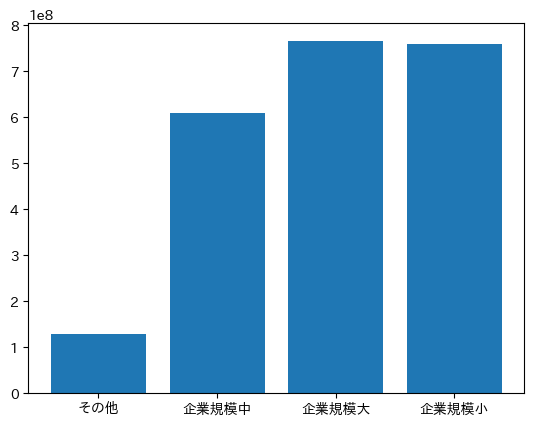

In [36]:
viz = df_sales_customer.groupby('顧客区分').agg({'売上': 'sum'})
plt.bar(viz.index, viz['売上'])

In [37]:
df_sales_customer['年'] = df_sales_customer['売上日'].dt.year
df_sales_customer.pivot_table(index=['顧客区分'], columns=['年'], values='売上', aggfunc='sum')

年,2021,2022
顧客区分,,
その他,68550000.0,58653000.0
企業規模中,313154000.0,296460000.0
企業規模大,389456000.0,375976000.0
企業規模小,397400000.0,361694000.0


In [38]:
df_sales_customer.to_csv('売上顧客データ_加工済み.csv', index=False)